## **Atividade dissertativa Analise de Series Temporais**

**Preparação biblioteca**

In [71]:
# Instalando o yahoo finance
!pip install yfinance --upgrade --no-cache-dir


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
!pip install requests --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [75]:
import requests
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.head(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
0,3M,MMMC34,Indústria diversificada,EUA
1,AB INBEV,ABUD34,Bebidas,Bélgica
2,ABB LTD,A1BB34,Industrial,Switzerland
3,ABBOTT,ABTT34,Farmacêuticos,EUA
4,ABBVIE,ABBV34,Medicamentos e Outros Produtos,EUA
5,ABIOMED INC,A1BM34,Saúde,EUA
6,ACTIVISION,ATVI34,Tecnologia,EUA
7,ADOBE INC,ADBE34,Tecnologia,EUA
8,ADVANCE AUTO PARTS INC,A1AP34,Peças Automotivas,EUA
9,ADVANCED MIC,A1MD34,Tecnologia,EUA


In [76]:
with pd.option_context('display.max_rows',10):
  print(df_nomes_tickers)

           EMPRESA  CÓDIGO                                   SETOR  \
0               3M  MMMC34                 Indústria diversificada   
1         AB INBEV  ABUD34                                 Bebidas   
2          ABB LTD  A1BB34                              Industrial   
3           ABBOTT  ABTT34                           Farmacêuticos   
4           ABBVIE  ABBV34          Medicamentos e Outros Produtos   
..             ...     ...                                     ...   
703  RAYTHEON TECH  RYTT34                              Industrial   
704   SCHLUMBERGER  SLBG34  Equipamentos e Serviços de Combustível   
705        TIFFANY  TIFF34                               Joalheria   
706     US BANCORP  USBC34                  Instituição Financeira   
707         XP INC  XPBR31                              Financeiro   

    PAÍS DE ORIGEM  
0              EUA  
1          Bélgica  
2      Switzerland  
3              EUA  
4              EUA  
..             ...  
703         

**Importar dados**

In [77]:
import pandas as pd
import matplotlib.pylab as plt
import yfinance as yf
import warnings
import matplotlib
import statsmodels.api as sm

In [78]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

In [79]:
# importar pacotes necessários
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

**EXERCICIO 01 - Obter os dados financeiros**

In [80]:
dados_series = yf.download("BTC-USD", start="2021-12-01", end="2022-01-31")

[*********************100%***********************]  1 of 1 completed


In [81]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                    Open          High           Low         Close  \
Date                                                                 
2021-12-01  56907.964844  59041.683594  56553.082031  57229.828125   
2021-12-02  57217.371094  57349.234375  55895.132812  56477.816406   
2021-12-03  56509.164062  57482.167969  52496.585938  53598.246094   
2021-12-04  53727.878906  53904.679688  42874.617188  49200.703125   
2021-12-05  49201.519531  49768.148438  47857.496094  49368.847656   
...                  ...           ...           ...           ...   
2022-01-26  36950.515625  38825.410156  36374.906250  36852.121094   
2022-01-27  36841.878906  37148.324219  35629.281250  37138.234375   
2022-01-28  37128.445312  37952.878906  36211.109375  37784.332031   
2022-01-29  37780.714844  38576.261719  37406.472656  38138.179688   
2022-01-30  38151.917969  38266.339844  37437.710938  37917.601562   

               Adj Close       Volume  
Date                                   
2021-12-0

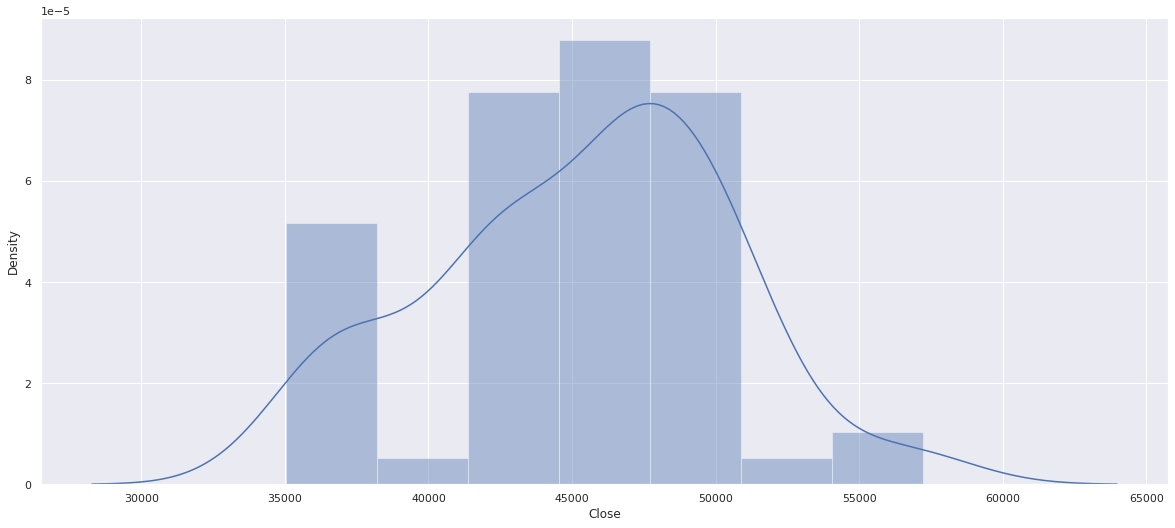

In [82]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [83]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [84]:
import plotly.offline as py
import plotly.graph_objs as go
dados_grafico = [go.Scatter(x=dados_series.index, y=dados_series['Close'])]
py.iplot(dados_grafico)

**EXERCICIO 02 - Decomposição da série**

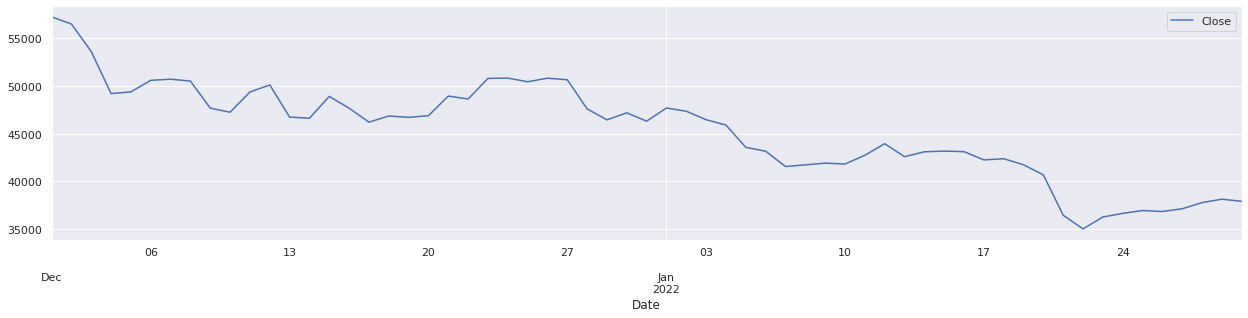

In [85]:
#Selecionar apenas os dados referentes ao preço de fechamento
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1)
df.plot(figsize = (19, 4)) 
plt.show()

In [86]:
pd.option_context('display.max_rows',10)
print(df)

                   Close
Date                    
2021-12-01  57229.828125
2021-12-02  56477.816406
2021-12-03  53598.246094
2021-12-04  49200.703125
2021-12-05  49368.847656
...                  ...
2022-01-26  36852.121094
2022-01-27  37138.234375
2022-01-28  37784.332031
2022-01-29  38138.179688
2022-01-30  37917.601562

[61 rows x 1 columns]


In [87]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8


**EXERCICIO 02 - Decomposições aditiva** 

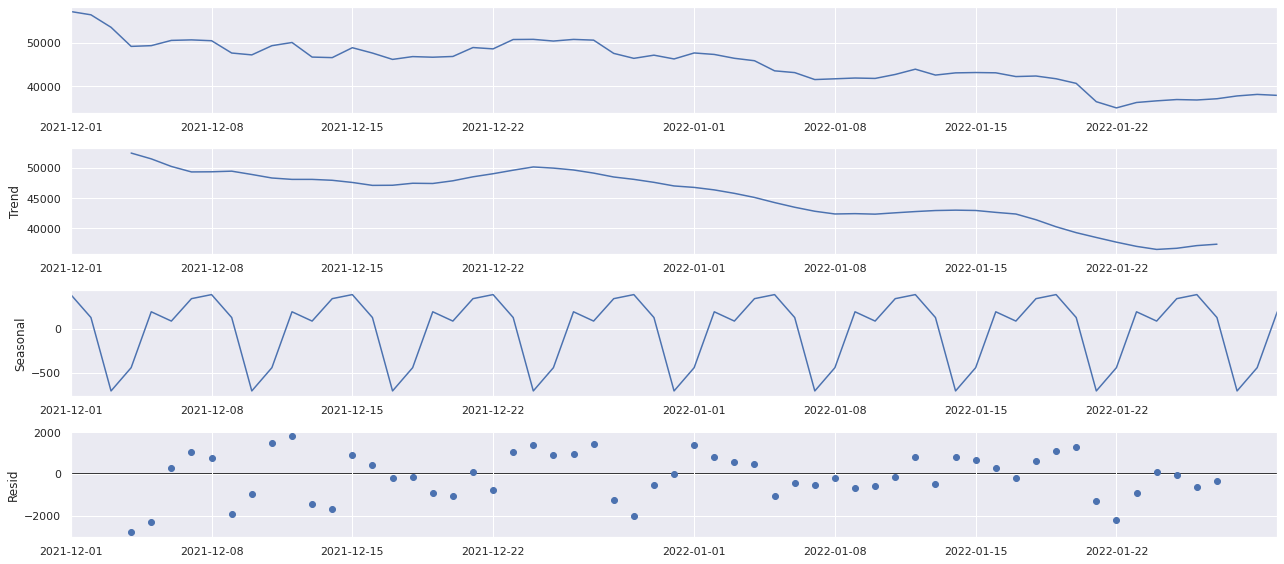

In [88]:
decomposition = sm.tsa.seasonal_decompose(x=df, model='additive')
fig = decomposition.plot()
plt.show()


**EXERCICIO 02 - Decomposições multiplicativa**

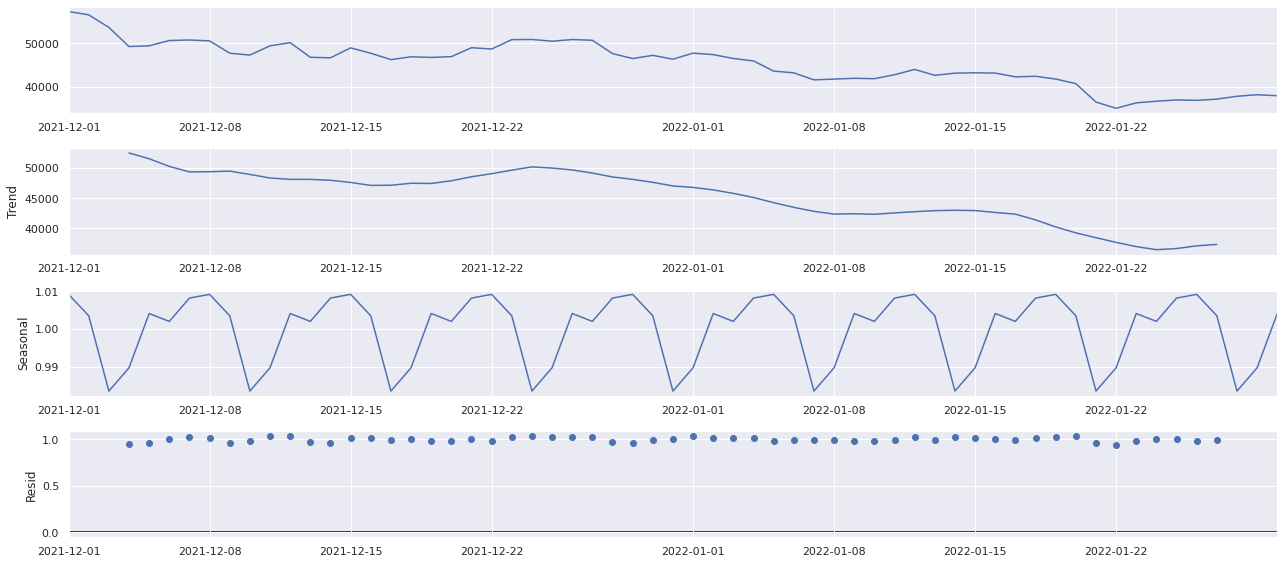

In [104]:
decomposition = sm.tsa.seasonal_decompose(x=df, model='multiplicative')
fig = decomposition.plot()
plt.show()

**EXERCICIO 03 - Médias Moveis (Suavizado)**

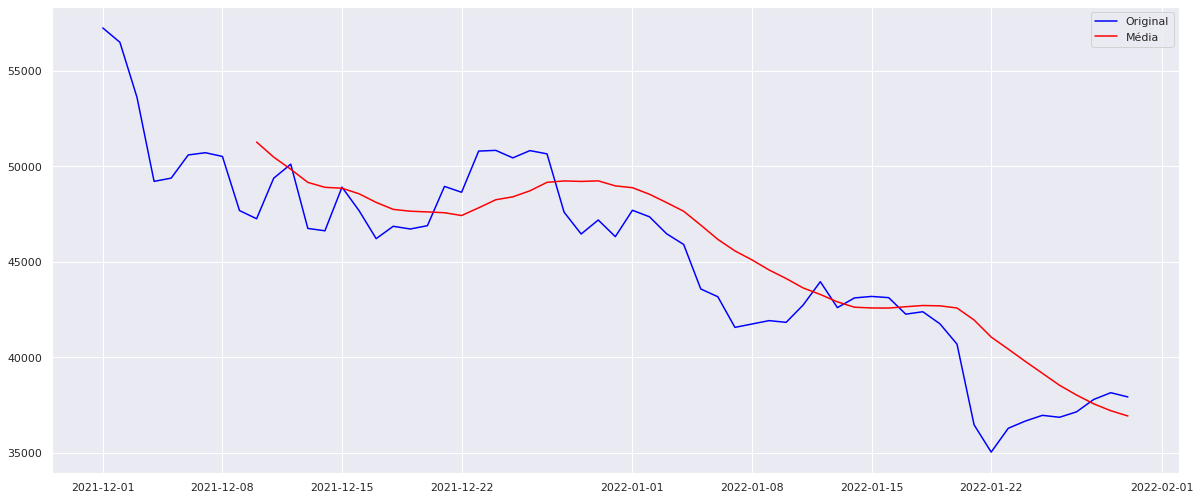

In [117]:
mm = pd.DataFrame.rolling(df,window=10,center=False).mean()
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Média')
plt.legend(loc='best')
plt.show()

In [120]:
# aplica o método para obter previsões para até 10 passos à frente (horizonte)
def medias_moveis(series, n):
    '''
        Calcula a média da últimas n observações
    '''
    return np.average(series[-n:])

In [119]:
medias_moveis(df, 12) # Previsão 10 passos à frente

37635.659830729164

**EXERCICIO 04 - Aplicando ARIMA**

In [121]:
dados_treinamento, dados_teste = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
dados_treinamento = dados_treinamento['Close'].values
dados_teste = dados_teste['Close'].values
historico = [x for x in dados_treinamento]
modelo_preditivo = []

In [122]:
N_observacoes_teste = len(dados_teste)
for ponto_de_teste in range(N_observacoes_teste):
  modelo = ARIMA(historico, order=(1,1,0))  
  modelo_fit = modelo.fit(disp=0)
  saida = modelo_fit.forecast()
  yhat = saida[0]
  modelo_preditivo.append(yhat)
  valor_real_teste = dados_teste[ponto_de_teste]
  historico.append(valor_real_teste)

In [123]:
erroMSE = mean_squared_error(dados_teste, modelo_preditivo)
print('O Erro Médio Quadrado (MSE) é {}'.format(erroMSE))

O Erro Médio Quadrado (MSE) é 1378804.2856417538


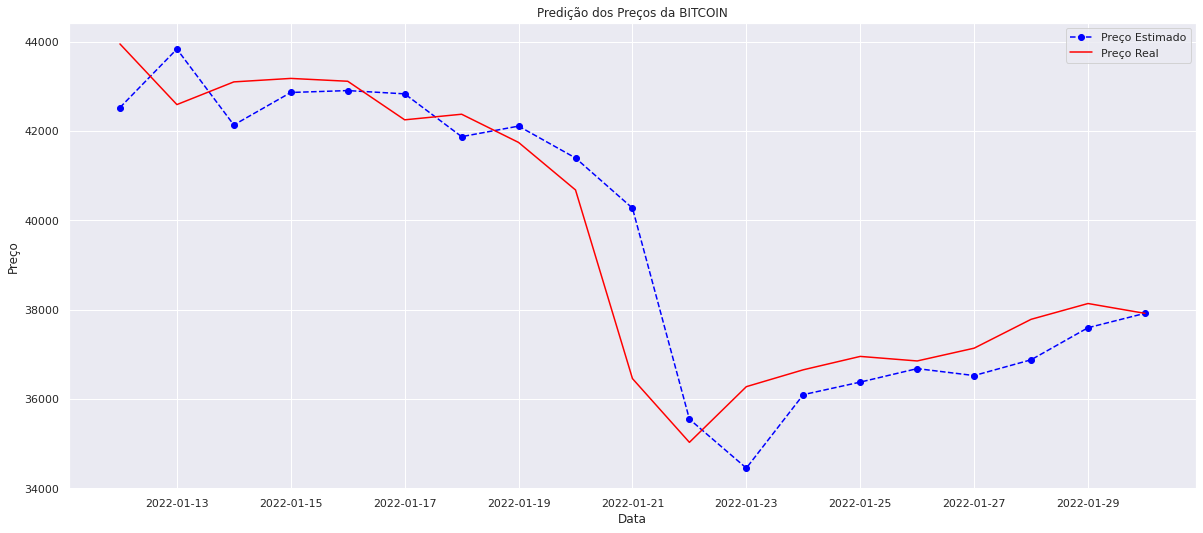

In [124]:
intervalo_dos_dados_de_teste = df[int(len(df)*0.7):].index
plt.plot(intervalo_dos_dados_de_teste, 
         modelo_preditivo, 
         color='blue', 
         marker='o', 
         linestyle='dashed',
         label='Preço Estimado')

plt.plot(intervalo_dos_dados_de_teste, 
         dados_teste, 
         color='red', 
         label='Preço Real')

plt.title('Predição dos Preços da BITCOIN')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

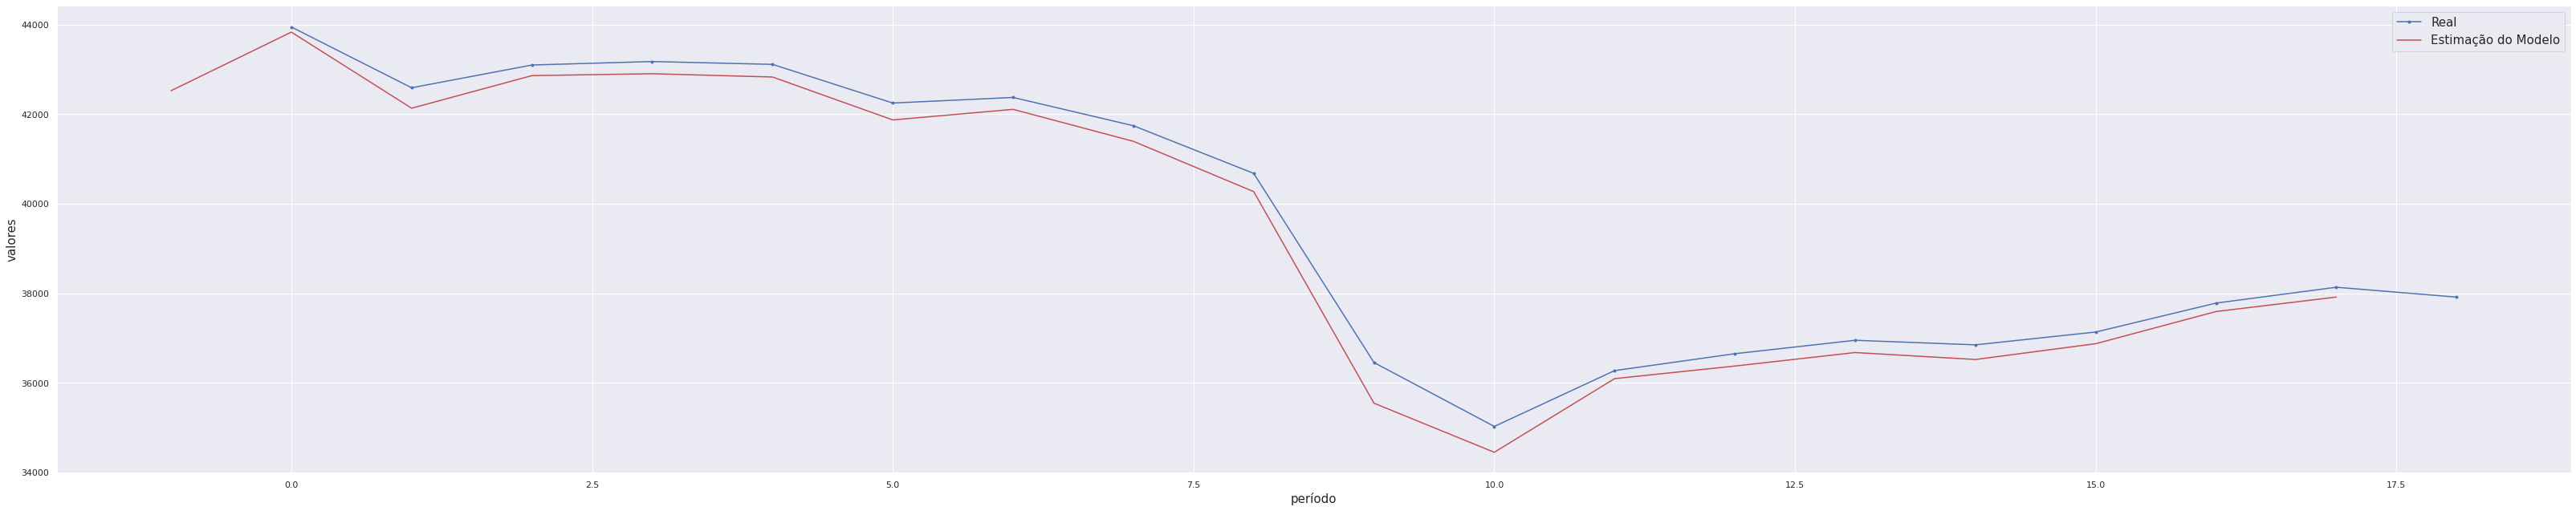

In [125]:
look_back = 1
plt.figure(figsize=(50,10))
plt.plot(list(np.arange(len(intervalo_dos_dados_de_teste))), 
         dados_teste, 
         marker='.', 
         label="Real")

plt.plot(list(np.arange(len(intervalo_dos_dados_de_teste))-look_back), 
         modelo_preditivo, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

In [126]:
modelo = ARIMA(historico, order=(1,1,0))  
modelo_fit = modelo.fit(disp=0)
saida = modelo_fit.forecast()
yhat = saida[0]
print('Valor previsto:{}'.format(yhat))

Valor previsto:[37610.13260776]
